# Cosine and Dot Product

In this notebook, we explore the connection between the cosine rule and the dot product.
We'll understand how to interpret dot products geometrically, how they relate to angles between vectors, and when they are zero or negative.

---

## 1. The Cosine Rule from Geometry

The **cosine rule** for a triangle with sides $a$, $b$, $c$ and angle $\theta$ between $a$ and $b$ is:

$$c^2 = a^2 + b^2 - 2ab \cos(\theta)$$

This applies to any triangle and is useful when working with non-right triangles.

Now, let's translate this rule into **vector language**.


In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Helper function to compute angle between vectors in degrees
def angle_between(v1, v2):
    # Calculate the cosine of the angle using dot product formula: cos(θ) = (v1·v2) / (||v1|| ||v2||)
    cos_theta = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
    
    # Use arccos to get the angle in radians, then convert to degrees
    # np.clip ensures cos_theta stays in [-1, 1] to avoid numerical errors with arccos
    return np.degrees(np.arccos(np.clip(cos_theta, -1.0, 1.0)))

## 2. From Cosine Rule to Dot Product

Let vectors $\vec{r}$ and $\vec{s}$ define two sides of a triangle. Then:

$$\| \vec{r} - \vec{s} \|^2 = \| \vec{r} \|^2 + \| \vec{s} \|^2 - 2 \|\vec{r}\| \|\vec{s}\| \cos(\theta)$$

By expanding the left-hand side as a dot product:

$$\| \vec{r} - \vec{s} \|^2 = (\vec{r} - \vec{s}) \cdot (\vec{r} - \vec{s}) = \vec{r} \cdot \vec{r} - 2\vec{r} \cdot \vec{s} + \vec{s} \cdot \vec{s}$$

We can match terms and derive:

$$\vec{r} \cdot \vec{s} = \|\vec{r}\| \|\vec{s}\| \cos(\theta)$$

This is the **dot product definition** from the cosine rule.

The notation $\|\vec{v}\|$ represents the **magnitude** (or length) of vector $\vec{v}$, also called the **norm**. It's the distance from the origin to the vector's endpoint.# 2. From Cosine Rule to Dot Product

Let vectors $\vec{r}$ and $\vec{s}$ define two sides of a triangle. Then:

$$\| \vec{r} - \vec{s} \|^2 = \| \vec{r} \|^2 + \| \vec{s} \|^2 - 2 \|\vec{r}\| \|\vec{s}\| \cos(\theta)$$

By expanding the left-hand side as a dot product:

$$\| \vec{r} - \vec{s} \|^2 = (\vec{r} - \vec{s}) \cdot (\vec{r} - \vec{s}) = \vec{r} \cdot \vec{r} - 2\vec{r} \cdot \vec{s} + \vec{s} \cdot \vec{s}$$

We can match terms and derive:

$$\vec{r} \cdot \vec{s} = \|\vec{r}\| \|\vec{s}\| \cos(\theta)$$

This is the **dot product definition** from the cosine rule.


r · s = 1.00
‖r‖ = 3.61, ‖s‖ = 2.24
cos(θ) = 0.12
Angle between r and s = 82.87°


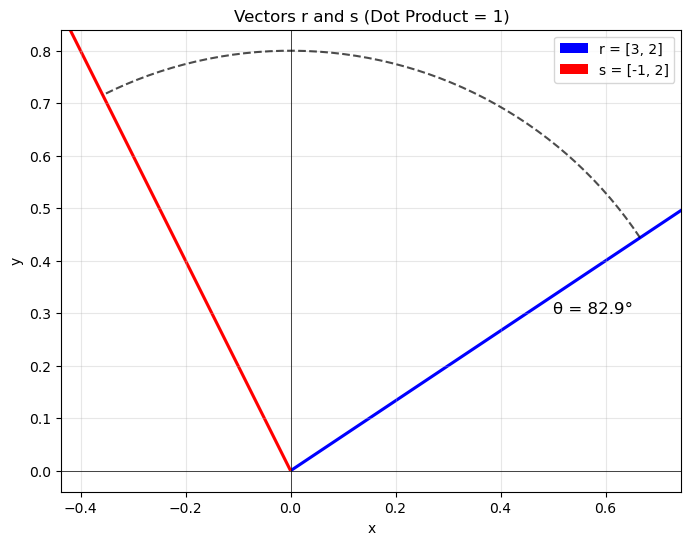

In [5]:
# Define two example vectors r and s
r = np.array([3, 2])
s = np.array([-1, 2])

# Compute dot product and cosine angle
dot_product = np.dot(r, s)
norm_r = np.linalg.norm(r)
norm_s = np.linalg.norm(s)
cos_theta = dot_product / (norm_r * norm_s)
theta_deg = angle_between(r, s)

print(f"r · s = {dot_product:.2f}")
print(f"‖r‖ = {norm_r:.2f}, ‖s‖ = {norm_s:.2f}")
print(f"cos(θ) = {cos_theta:.2f}")
print(f"Angle between r and s = {theta_deg:.2f}°")

# Visualize the vectors and angle
plt.figure(figsize=(8, 6))
plt.quiver(0, 0, r[0], r[1], angles='xy', scale_units='xy', scale=1, color='blue', width=0.005, label='r = [3, 2]')
plt.quiver(0, 0, s[0], s[1], angles='xy', scale_units='xy', scale=1, color='red', width=0.005, label='s = [-1, 2]')

# Draw angle arc correctly - from r to s
angle_r = np.arctan2(r[1], r[0])
angle_s = np.arctan2(s[1], s[0])
arc_angles = np.linspace(angle_r, angle_s, 50)
arc_radius = 0.8
arc_x = arc_radius * np.cos(arc_angles)
arc_y = arc_radius * np.sin(arc_angles)
plt.plot(arc_x, arc_y, 'k--', alpha=0.7)
plt.text(0.5, 0.3, f'θ = {theta_deg:.1f}°', fontsize=12)

# Add grid and labels
plt.grid(True, alpha=0.3)
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.xlim(-2, 4)
plt.ylim(-1, 3)
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Vectors r and s (Dot Product = {dot_product})')
plt.legend()
plt.axis('equal')
plt.show()


## 3. Geometric Interpretation

The **dot product** tells us how much two vectors "point in the same direction".

- If $\theta = 0°$, $\cos(\theta) = 1$ → $\vec{r} \cdot \vec{s}$ is maximal and **positive**
- If $\theta = 90°$, $\cos(\theta) = 0$ → $\vec{r} \cdot \vec{s} = 0$ → vectors are **orthogonal**
- If $\theta = 180°$, $\cos(\theta) = -1$ → $\vec{r} \cdot \vec{s}$ is **negative**

Let's visualize these cases.


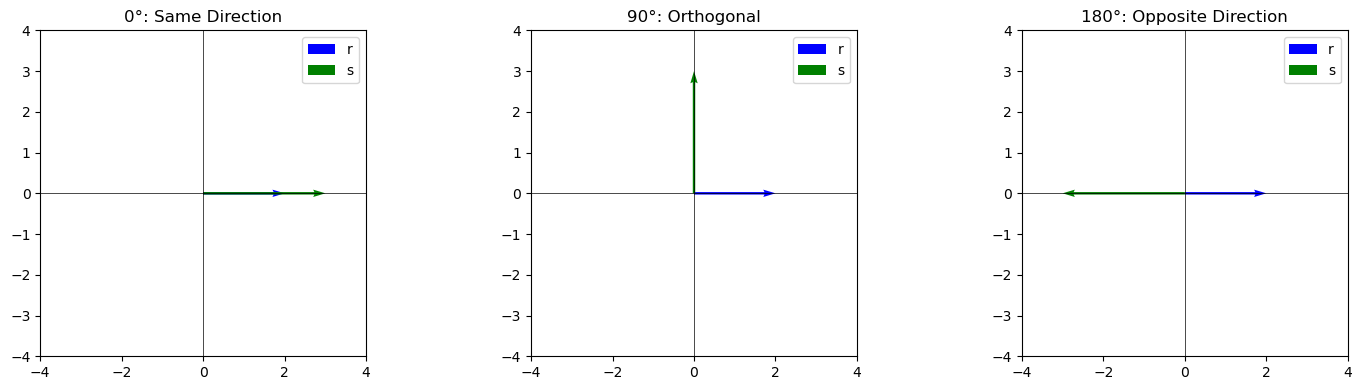

In [6]:
# Plot three scenarios: 0°, 90°, 180°
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

scenarios = [
    (np.array([2, 0]), np.array([3, 0]), "0°: Same Direction"),
    (np.array([2, 0]), np.array([0, 3]), "90°: Orthogonal"),
    (np.array([2, 0]), np.array([-3, 0]), "180°: Opposite Direction")
]

for ax, (v1, v2, title) in zip(axs, scenarios):
    ax.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='blue', label='r')
    ax.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='green', label='s')
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    ax.set_aspect('equal')
    ax.axhline(0, color='black', lw=0.5)
    ax.axvline(0, color='black', lw=0.5)
    ax.set_title(title)
    ax.legend()

plt.tight_layout()
plt.show()


## 4. Orthogonality and Sign of Dot Product

- If $\vec{r} \cdot \vec{s} = 0$, then vectors are orthogonal (perpendicular).
- If $\vec{r} \cdot \vec{s} > 0$, vectors form an acute angle.
- If $\vec{r} \cdot \vec{s} < 0$, vectors form an obtuse angle.

This is very useful in applications like projections, similarity measures, and understanding directions in ML and physics.


In [7]:
# Explore different dot product values for interpretation
examples = [
    (np.array([2, 0]), np.array([1, 0])),     # acute
    (np.array([2, 0]), np.array([0, 2])),     # orthogonal
    (np.array([2, 0]), np.array([-1, 0])),    # obtuse
]

for u, v in examples:
    dot = np.dot(u, v)
    angle = angle_between(u, v)
    print(f"u = {u}, v = {v} → u·v = {dot:.2f}, angle = {angle:.2f}°")


u = [2 0], v = [1 0] → u·v = 2.00, angle = 0.00°
u = [2 0], v = [0 2] → u·v = 0.00, angle = 90.00°
u = [2 0], v = [-1  0] → u·v = -2.00, angle = 180.00°


## ✅ Summary

- The **dot product** of two vectors relates to their lengths and the cosine of the angle between them.
- The sign and magnitude of the dot product tells us:
  - How aligned two vectors are
  - Whether they're orthogonal (dot = 0)
  - Whether they're in opposite directions (dot < 0)

This geometric intuition underpins many ideas in physics, graphics, and machine learning.

---

Try changing the vectors in the code above and explore how the dot product and angle behave!
